In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve 
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint 

from imblearn.over_sampling import SMOTE
from collections import Counter

#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import shap

In [133]:
data = pd.read_csv("heart_data_cleaned.csv",skipinitialspace = True, float_precision = "round_trip")
for i in range(len(data["HadHeartAttack"])):
    if data["HadHeartAttack"][i] == 1:
           data["HadHeartAttack"][i] = 1
    elif data["HadHeartAttack"][i] == 2:
           data["HadHeartAttack"][i] = 0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [134]:
data["HadHeartAttack"].tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,


In [135]:
data.describe().T

count       mean        std    min    25%  \
State                      246022.0  27.781914  15.015516   1.00  15.00   
Sex                        246022.0   1.519510   0.499620   1.00   1.00   
GeneralHealth              246022.0   2.510084   1.032808   1.00   2.00   
PhysicalHealthDays         246022.0   4.119026   8.405844   0.00   0.00   
MentalHealthDays           246022.0   4.167140   8.102687   0.00   0.00   
LastCheckupTime            246022.0   1.339031   0.775630   1.00   1.00   
PhysicalActivities         246022.0   1.222354   0.415829   1.00   1.00   
SleepHours                 246022.0   7.021331   1.440681   1.00   6.00   
RemovedTeeth               246022.0   2.822122   1.350290   1.00   1.00   
HadHeartAttack             246022.0   0.054609   0.227216   0.00   0.00   
HadAngina                  246022.0   1.939221   0.238925   1.00   2.00   
HadStroke                  246022.0   1.958898   0.198527   1.00   2.00   
HadAsthma                  246022.0   1.851521   0.355574   1.00   2.00   
HadSkinCancer              246022.0   1.914556   0.279541   1.00   2.00   
HadCOPD                    246022.0   1.922796   0.266916   1.00   2.00   
HadDepressiveDisorder      246022.0   1.794246   0.404252   1.00   2.00   
HadKidneyDisease           246022.0   1.954134   0.209194   1.00   2.00   
HadArthritis               246022.0   1.654978   0.475376   1.00   1.00   
HadDiabetes                246022.0   2.738979   0.715264   1.00   3.00   
DeafOrHardOfHearing        246022.0   1.914512   0.279608   1.00   2.00   
BlindOrVisionDifficulty    246022.0   1.950305   0.217314   1.00   2.00   
DifficultyConcentrating    246022.0   1.893424   0.308574   1.00   2.00   
DifficultyWalking          246022.0   1.853387   0.353720   1.00   2.00   
DifficultyDressingBathing  246022.0   1.966101   0.180971   1.00   2.00   
DifficultyErrands          246022.0   1.933404   0.249321   1.00   2.00   
SmokerStatus               246022.0   3.391510   0.912301   1.00   3.00   
ECigaretteUsage            246022.0   1.606100   1.161212   1.00   1.00   
ChestScan                  246022.0   1.576461   0.494120   1.00   1.00   
RaceEthnicityCategory      246022.0   1.612803   1.254387   1.00   1.00   
AgeCategory                246022.0   7.718086   3.465526   1.00   5.00   
HeightInMeters             246022.0   1.705150   0.106654   0.91   1.63   
WeightInKilograms          246022.0  83.615179  21.323156  28.12  68.04   
BMI                        246022.0  28.668136   6.513973  12.02  24.27   
AlcoholDrinkers            246022.0   1.450021   0.497497   1.00   1.00   
HIVTesting                 246022.0   1.656527   0.474869   1.00   1.00   
FluVaxLast12               246022.0   1.466731   0.498893   1.00   1.00   
PneumoVaxEver              246022.0   1.593971   0.491091   1.00   1.00   
TetanusLast10Tdap          246022.0   2.680130   1.205607   1.00   1.00   
HighRiskLastYear           246022.0   1.957012   0.202831   1.00   2.00   
CovidPos                   246022.0   1.748266   0.506544   1.00   1.00   

                             50%    75%     max  
State                      27.00  42.00   54.00  
Sex                         2.00   2.00    2.00  
GeneralHealth               2.00   3.00    5.00  
PhysicalHealthDays          0.00   3.00   30.00  
MentalHealthDays            0.00   4.00   30.00  
LastCheckupTime             1.00   1.00    4.00  
PhysicalActivities          1.00   1.00    2.00  
SleepHours                  7.00   8.00   24.00  
RemovedTeeth                4.00   4.00    4.00  
HadHeartAttack              0.00   0.00    1.00  
HadAngina                   2.00   2.00    2.00  
HadStroke                   2.00   2.00    2.00  
HadAsthma                   2.00   2.00    2.00  
HadSkinCancer               2.00   2.00    2.00  
HadCOPD                     2.00   2.00    2.00  
HadDepressiveDisorder       2.00   2.00    2.00  
HadKidneyDisease            2.00   2.00    2.00  
HadArthritis                2.00   2.00    2.00  
HadD

In [136]:
data.dtypes

State                          int64
Sex                            int64
GeneralHealth                  int64
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime                int64
PhysicalActivities             int64
SleepHours                   float64
RemovedTeeth                   int64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                    int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                   int64
ECigaretteUsage                int64
C

In [137]:
data['HadHeartAttack'].value_counts()

HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

In [138]:
no_ha = data.loc[data['HadHeartAttack'] == 1]
ha = data.loc[data['HadHeartAttack'] == 0].sample(n = 13435, random_state=33)
frames = [ha,no_ha]
data = pd.concat(frames)

In [139]:
data['HadHeartAttack'].value_counts()

HadHeartAttack
0    13435
1    13435
Name: count, dtype: int64

In [140]:
from sklearn.feature_selection import mutual_info_classif

MI_features = ["State","Sex","GeneralHealth","PhysicalHealthDays","MentalHealthDays",
              "LastCheckupTime","SleepHours","RemovedTeeth","HadAngina","HadStroke",
              "HadAsthma","HadSkinCancer","HadCOPD","HadDepressiveDisorder", 
               "HadKidneyDisease","HadArthritis","HadDiabetes","DeafOrHardOfHearing",
              "BlindOrVisionDifficulty","DifficultyConcentrating","DifficultyWalking",
              "DifficultyDressingBathing","DifficultyErrands","SmokerStatus",
               "ECigaretteUsage","ChestScan","RaceEthnicityCategory","AgeCategory",
              "HeightInMeters","WeightInKilograms","BMI","AlcoholDrinkers","HIVTesting",
              "FluVaxLast12","PneumoVaxEver","TetanusLast10Tdap","HighRiskLastYear",
              "CovidPos"]

mutual_infos = (mutual_info_classif(X=data[MI_features],
                                    y=data["HadHeartAttack"], 
                                    n_neighbors=10,
                                    random_state=20))

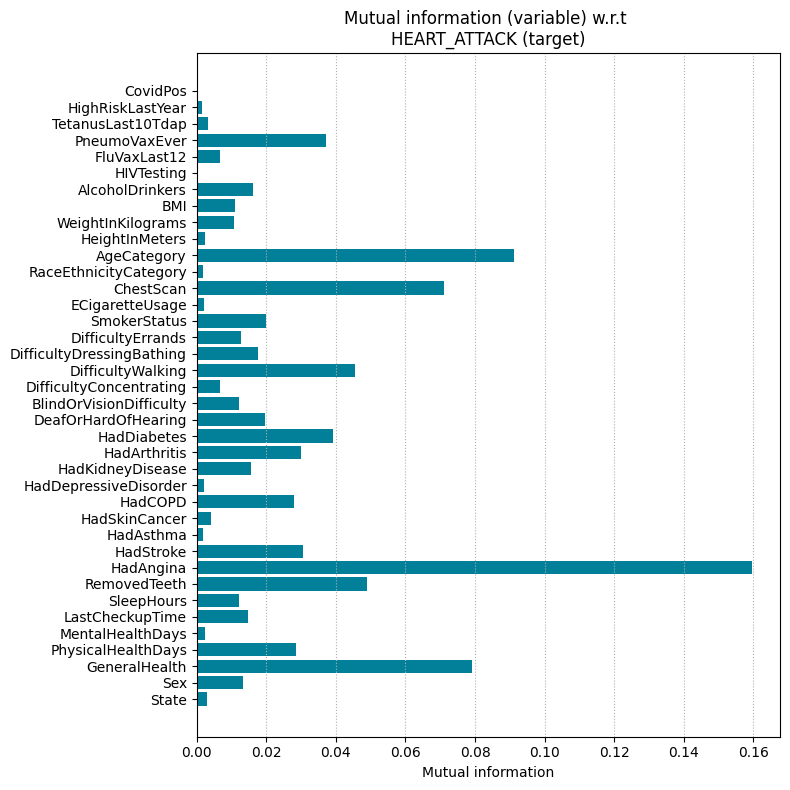

In [141]:
plt.figure(figsize=(8, 8))
plt.barh(y=MI_features, width=mutual_infos, color="#038099")
plt.title("Mutual information (variable) w.r.t \nHEART_ATTACK (target)");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

In [142]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, precision_score

X = data[MI_features]
Y = data["HadHeartAttack"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, test_size = 0.20, random_state = 109)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", Y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", Y_test.shape)

X_Train Shape: (21496, 38)
Y_Train Shape: (21496,)
X_Test Shape: (5374, 38)
Y_Test Shape: (5374,)


In [143]:
data_features = dict(enumerate(X.columns))
data_features

{0: 'State',
 1: 'Sex',
 2: 'GeneralHealth',
 3: 'PhysicalHealthDays',
 4: 'MentalHealthDays',
 5: 'LastCheckupTime',
 6: 'SleepHours',
 7: 'RemovedTeeth',
 8: 'HadAngina',
 9: 'HadStroke',
 10: 'HadAsthma',
 11: 'HadSkinCancer',
 12: 'HadCOPD',
 13: 'HadDepressiveDisorder',
 14: 'HadKidneyDisease',
 15: 'HadArthritis',
 16: 'HadDiabetes',
 17: 'DeafOrHardOfHearing',
 18: 'BlindOrVisionDifficulty',
 19: 'DifficultyConcentrating',
 20: 'DifficultyWalking',
 21: 'DifficultyDressingBathing',
 22: 'DifficultyErrands',
 23: 'SmokerStatus',
 24: 'ECigaretteUsage',
 25: 'ChestScan',
 26: 'RaceEthnicityCategory',
 27: 'AgeCategory',
 28: 'HeightInMeters',
 29: 'WeightInKilograms',
 30: 'BMI',
 31: 'AlcoholDrinkers',
 32: 'HIVTesting',
 33: 'FluVaxLast12',
 34: 'PneumoVaxEver',
 35: 'TetanusLast10Tdap',
 36: 'HighRiskLastYear',
 37: 'CovidPos'}

In [144]:
# Implement SMOTE
sampling = SMOTE(random_state = 100)
X_train, Y_train = sampling.fit_resample(X_train.values, Y_train.values.ravel())
    
# Shuffle the data
perms = np.random.permutation(X_train.shape[0])
X_train = X_train[perms]
Y_train = Y_train[perms]

X_train = pd.DataFrame(data = X_train)
Y_train = pd.DataFrame(data = Y_train)

print(X_train.shape)
print(Y_train.shape)

(21528, 38)
(21528, 1)


In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X has feature names, but StandardScaler was fitted without feature names


In [146]:
svm = SVC(kernel = 'linear', probability = True, random_state = 100)
svm = svm.fit(X_train, Y_train.values.ravel())

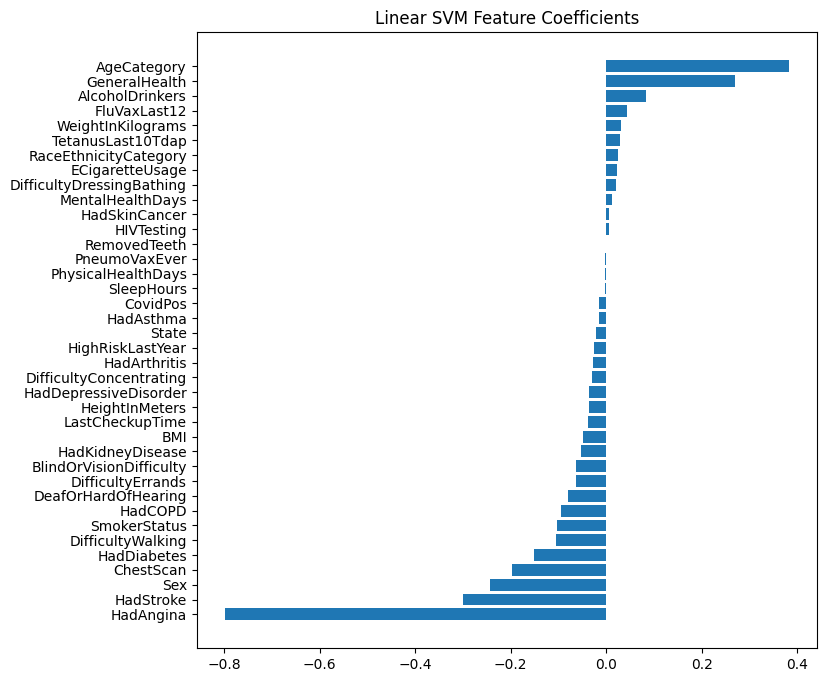

In [147]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(8, 8))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Linear SVM Feature Coefficients")
    plt.show()

feat_names = list(data_features.values())
f_importances(svm.coef_[0], feat_names)

['State',
 'Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'LastCheckupTime',
 'SleepHours',
 'RemovedTeeth',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

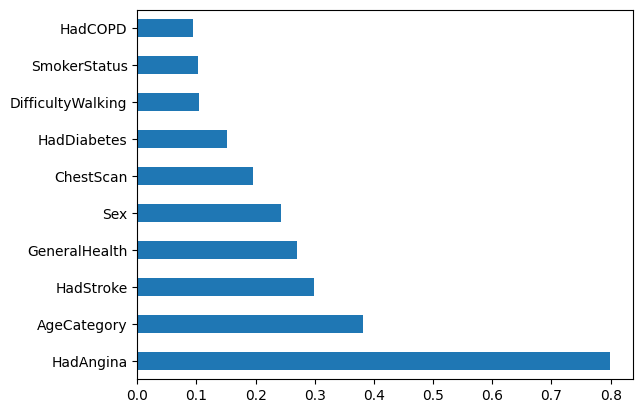

In [148]:
pd.Series(abs(svm.coef_[0]), index=feat_names).nlargest(10).plot(kind='barh')
feat_names

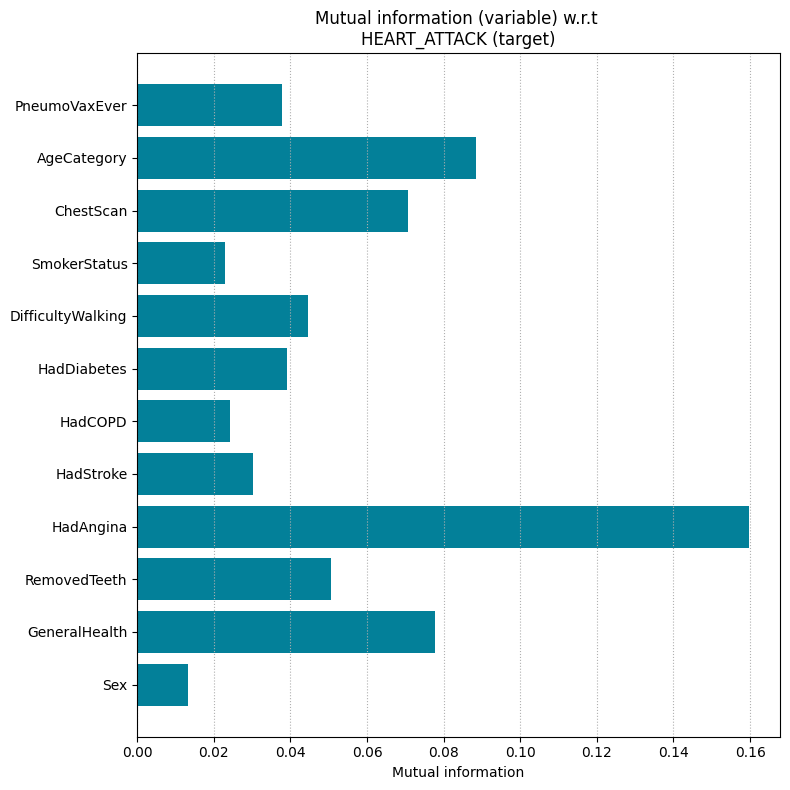

In [149]:
new_MI_features = ["Sex","GeneralHealth","RemovedTeeth","HadAngina","HadStroke",
"HadCOPD","HadDiabetes","DifficultyWalking","SmokerStatus",
"ChestScan","AgeCategory","PneumoVaxEver"]



mutual_infos = (mutual_info_classif(X=data[new_MI_features],
                                    y=data["HadHeartAttack"], 
                                    n_neighbors=10,
                                    random_state=20))

plt.figure(figsize=(8, 8))
plt.barh(y=new_MI_features, width=mutual_infos, color="#038099")
plt.title("Mutual information (variable) w.r.t \nHEART_ATTACK (target)");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

In [150]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, precision_score

X = data[new_MI_features]
Y = data[["HadHeartAttack"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, test_size = 0.20, random_state = 109)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", Y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", Y_test.shape)

X_Train Shape: (21496, 12)
Y_Train Shape: (21496, 1)
X_Test Shape: (5374, 12)
Y_Test Shape: (5374, 1)


In [151]:
data_features = dict(enumerate(X.columns))
data_features

{0: 'Sex',
 1: 'GeneralHealth',
 2: 'RemovedTeeth',
 3: 'HadAngina',
 4: 'HadStroke',
 5: 'HadCOPD',
 6: 'HadDiabetes',
 7: 'DifficultyWalking',
 8: 'SmokerStatus',
 9: 'ChestScan',
 10: 'AgeCategory',
 11: 'PneumoVaxEver'}

In [152]:
# Implement SMOTE
sampling = SMOTE(random_state = 100)
X_train, Y_train = sampling.fit_resample(X_train.values, Y_train.values.ravel())
    
# Shuffle the data
perms = np.random.permutation(X_train.shape[0])
X_train = X_train[perms]
Y_train = Y_train[perms]

X_train = pd.DataFrame(data = X_train)
Y_train = pd.DataFrame(data = Y_train)

print(X_train.shape)
print(Y_train.shape)

(21528, 12)
(21528, 1)


In [153]:
#Data Normalization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X has feature names, but StandardScaler was fitted without feature names


In [185]:
import seaborn as sns
def Generate_Model_Test_Classification_Report(model, X_test, y_test, model_name=""):

        '''
        Purpose: 
            Generate the consolidated test classification report. 
            A one-stop function to generate all the relevant model evaluation metrics. 
            The report consists of the following classification results & metrics -
                1. Confusion Matrix
                2. Classification Report
                3. F1 Score
                4. Accuracy
                5. Mathews Correlation Coefficient (MCC)
                6. Precision
                7. Recall
                8. AUROC Score - Area Under the Receiver Operating Characteristic Curve
                9. AUC-PR Score - Area Under the Precision Recall Curve.
                10. AUROC Curve - Area Under the Receiver Operating Characteristic Curve
                11. AUC-PR Curve - Area Under the Precision Recall Curve.

        Parameters:
            1. y_test - The Ground Truth for each test image.
            2. y_pred - The Predicted label for each image.
            3. model_name - Model Name

        Return Value: 
            NONE.
        '''

        y = 1.05
        # Report Title & Classification Mterics Abbreviations...
        fig, axes = plt.subplots(3, 1, figsize = (8, 3))
        axes[0].text(9, 1.8, "CONSOLIDATED MODEL TEST REPORT", fontsize=30, horizontalalignment='center', 
                     color='DarkBlue', weight = 'bold')

        axes[0].axis([0, 10, 0, 10])
        axes[0].axis('off')

        axes[1].text(9, 4, "Model Name: " + model_name, style='italic', 
                             fontsize=18, horizontalalignment='center', color='DarkOrange', weight = 'bold')

        axes[1].axis([0, 10, 0, 10])
        axes[1].axis('off')

        axes[2].text(0, 4, "* 1 - Had Heart Attack\t\t\t\t\t\t\t * 0 - Did not have Heart Attack\n".expandtabs() +
                     "* MCC - Matthews Correlation Coefficient\t\t* AUC - Area Under The Curve\n".expandtabs() +
                     "* ROC - Receiver Operating Characteristics     " + 
                     "\t* AUROC - Area Under the Receiver Operating    Characteristics".expandtabs(), 
                     style='italic', fontsize=10, horizontalalignment='left', color='orangered')

        axes[2].axis([0, 10, 0, 10])
        axes[2].axis('off')

        scores = []
        metrics = ['F1       ', 'MCC      ', 'Precision', 'Recall   ', 'Accuracy ',
                   'AUC_ROC  ', 'AUC_PR   ']

        # Plot ROC and PR curves using all models and test data...
        y_pred = model.predict(X_test)
        y_pred_probs = model.predict_proba(X_test)[:, 1:]

        fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred)
        precision, recall, th = precision_recall_curve(y_test.values.ravel(), y_pred_probs)

        # Calculate the individual classification metic scores...
        model_f1_score = f1_score(y_test, y_pred)
        model_matthews_corrcoef_score = matthews_corrcoef(y_test, y_pred)
        model_precision_score = precision_score(y_test, y_pred)
        model_recall_score = recall_score(y_test, y_pred)
        model_accuracy_score = accuracy_score(y_test, y_pred)
        model_auc_roc = auc(fpr, tpr)
        model_auc_pr = auc(recall, precision)

        scores.append([model_f1_score,
                       model_matthews_corrcoef_score,
                       model_precision_score,
                       model_recall_score,
                       model_accuracy_score,
                       model_auc_roc,
                       model_auc_pr])

        sampling_results = pd.DataFrame(columns = ['Classification Metric', 'Score Value'])
        for i in range(len(scores[0])):
            sampling_results.loc[i] = [metrics[i], scores[0][i]]

        sampling_results.index = np.arange(1, len(sampling_results) + 1)

        class_report = classification_report(y_test, y_pred)
        conf_matx = confusion_matrix(y_test, y_pred)

        # Display the Confusion Matrix...
        fig, axes = plt.subplots(1, 3, figsize = (20, 4))
        sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes[0])
        axes[0].set_title("1. Confusion Matrix", fontsize=21, color='darkgreen', weight = 'bold', 
                          style='italic', loc='left', y=y)

        # Classification Metrics
        axes[1].text(5, 1.8, sampling_results.to_string(float_format='{:,.4f}'.format, index=False), style='italic', 
                     fontsize=20, horizontalalignment='center')
        axes[1].axis([0, 10, 0, 10])
        axes[1].axis('off')
        axes[1].set_title("2. Classification Metrics", fontsize=20, color='darkgreen', weight = 'bold', 
                          style='italic', loc='center', y=y)

        # Classification Report
        axes[2].text(0, 1, class_report, style='italic', fontsize=20)
        axes[2].axis([0, 10, 0, 10])
        axes[2].axis('off')
        axes[2].set_title("3. Classification Report", fontsize=20, color='darkgreen', weight = 'bold', 
                          style='italic', loc='center', y=y)

        plt.tight_layout()
        plt.show()

        # AUC-ROC & Precision-Recall Curve
        fig, axes = plt.subplots(1, 2, figsize = (14, 4))

        axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
        axes[1].plot(recall, precision, label = f"auc_pr = {model_auc_pr:.3f}")

        axes[0].plot([0, 1], [0, 1], 'k--')
        axes[0].legend(loc = "lower right")
        axes[0].set_xlabel("False Positive Rate")
        axes[0].set_ylabel("True Positive Rate")
        axes[0].set_title("4. AUC - ROC Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                          style='italic', loc='center', pad=1, y=y)

        axes[1].legend(loc = "lower left")
        axes[1].set_xlabel("Recall")
        axes[1].set_ylabel("Precision")
        axes[1].set_title("5. Precision - Recall Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                          style='italic', loc='center', pad=3, y=y)

        plt.subplots_adjust(top=0.95) 
        plt.tight_layout()
        plt.show()
        
        return scores

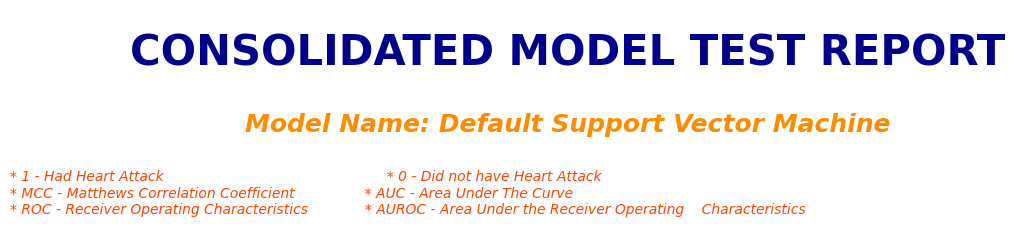

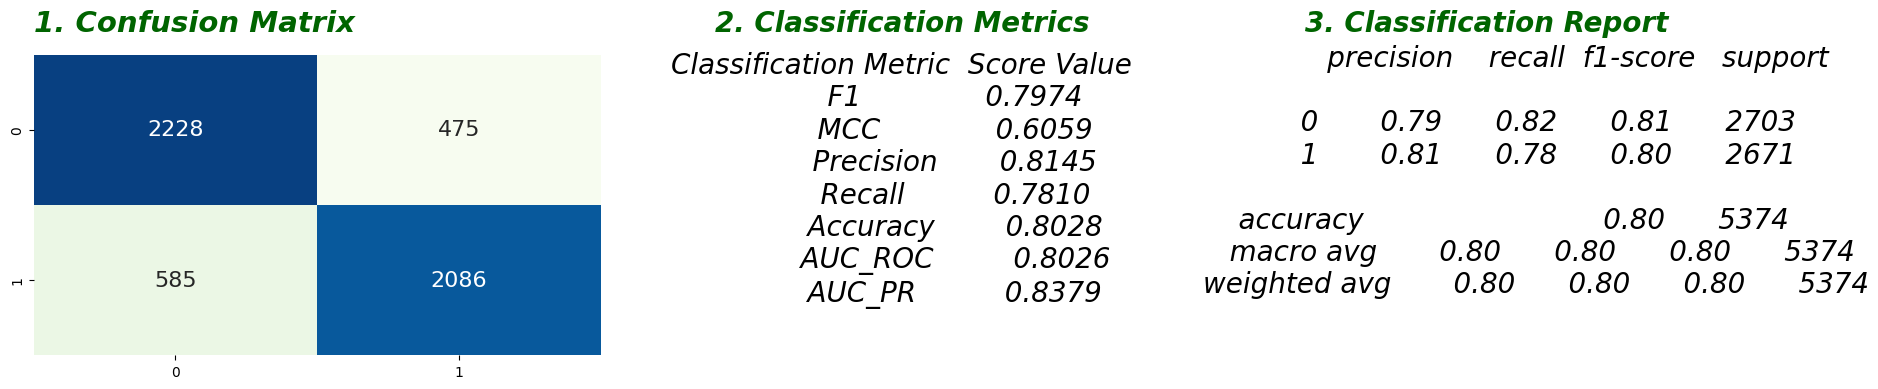

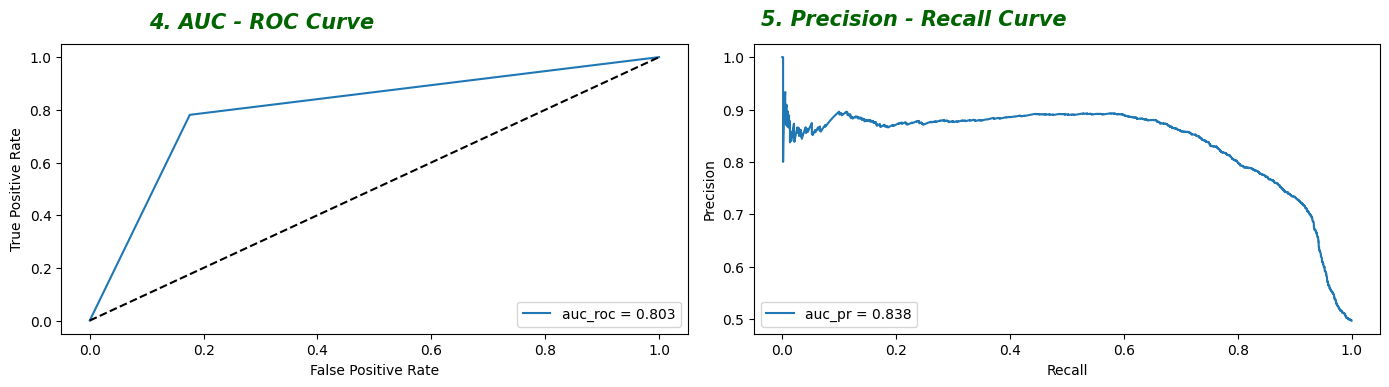

In [186]:
# SVM with Default Parameters and probability = True

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train, Y_train.values.ravel())
svm_model = Generate_Model_Test_Classification_Report(svm, X_test, Y_test, model_name="Default Support Vector Machine")


In [187]:
svm_model

[[0.7974006116207951,
  0.6059060364907832,
  0.8145255759468958,
  0.780980906027705,
  0.8027540007443246,
  0.8026251182006819,
  0.8378646971768351]]

In [164]:
# GridSearchCV to find best parameters for svm
svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

# parameters to build the model on
param_grid = {'C': [1000,1100,1200,1300,1400],  
              'gamma': [0.001,0.0015,0.002,0.0025,0.003]}  

grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                  scoring = 'accuracy', n_jobs = -1, cv = 10, verbose = 2)

# fitting the model for grid search 
grid_search.fit(X_train, Y_train.values.ravel())

print("Best Parameters:", grid_search.best_params_) 
print("\nBest Classifier:", grid_search.best_estimator_) 

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END ...............................C=1000, gamma=0.0015; total time=  49.3s
[CV] END ................................C=1000, gamma=0.002; total time=  56.5s
[CV] END ...............................C=1000, gamma=0.0025; total time= 1.1min
[CV] END ................................C=1000, gamma=0.003; total time= 1.2min
[CV] END ................................C=1100, gamma=0.001; total time=  45.7s
[CV] END ................................C=1100, gamma=0.002; total time=  57.7s
[CV] END ...............................C=1100, gamma=0.0025; total time= 1.1min
[CV] END ................................C=1100, gamma=0.003; total time= 1.2min
[CV] END ................................C=1200, gamma=0.001; total time=  47.6s
[CV] END ...............................C=1200, gamma=0.0015; total time=  52.7s
[CV] END ...............................C=1200, gamma=0.0025; total time= 1.1min
[CV] END ................................C=120

In [165]:
best_svc = grid_search.best_estimator_
best_svc.fit(X_train, Y_train.values.ravel())


SVC(C=1100, gamma=0.001, probability=True, random_state=100)

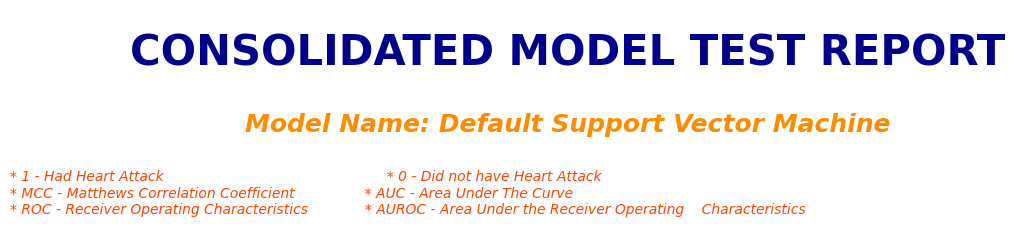

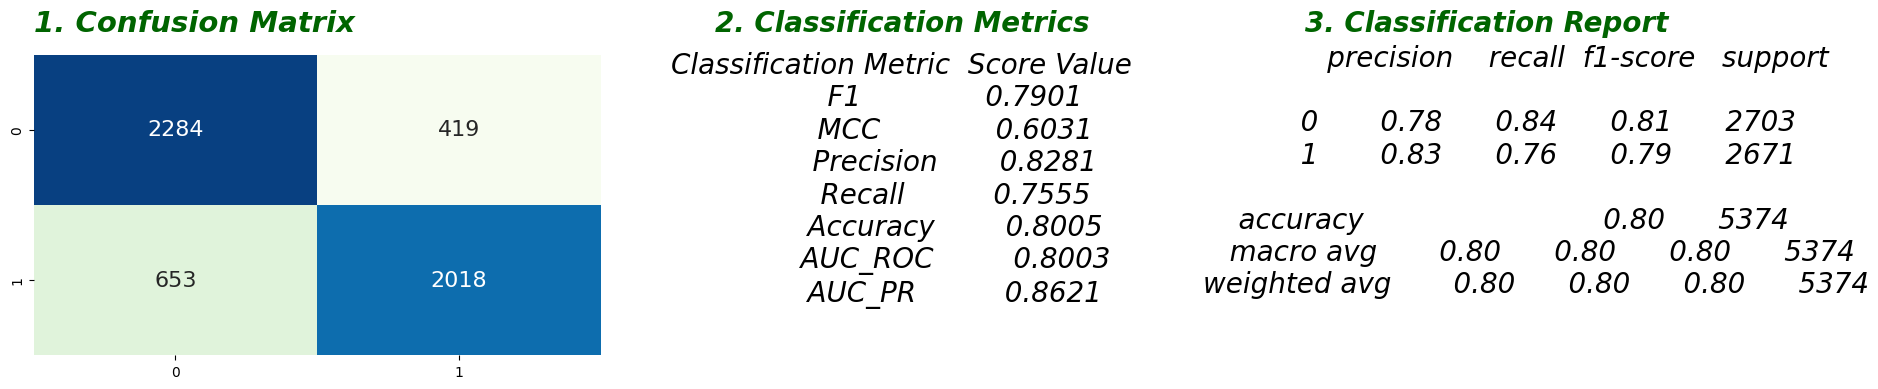

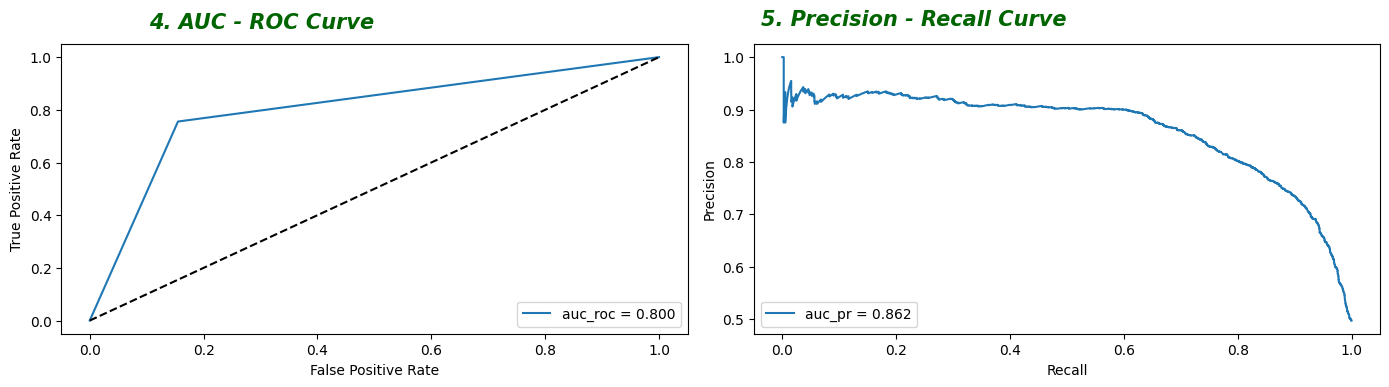

In [188]:
best_svc = Generate_Model_Test_Classification_Report(best_svc, X_test, Y_test, model_name="Default Support Vector Machine")

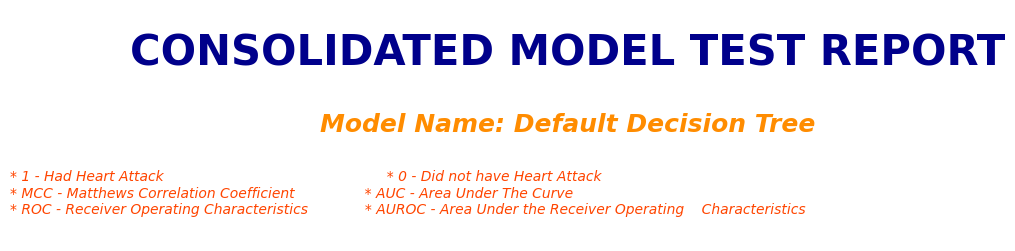

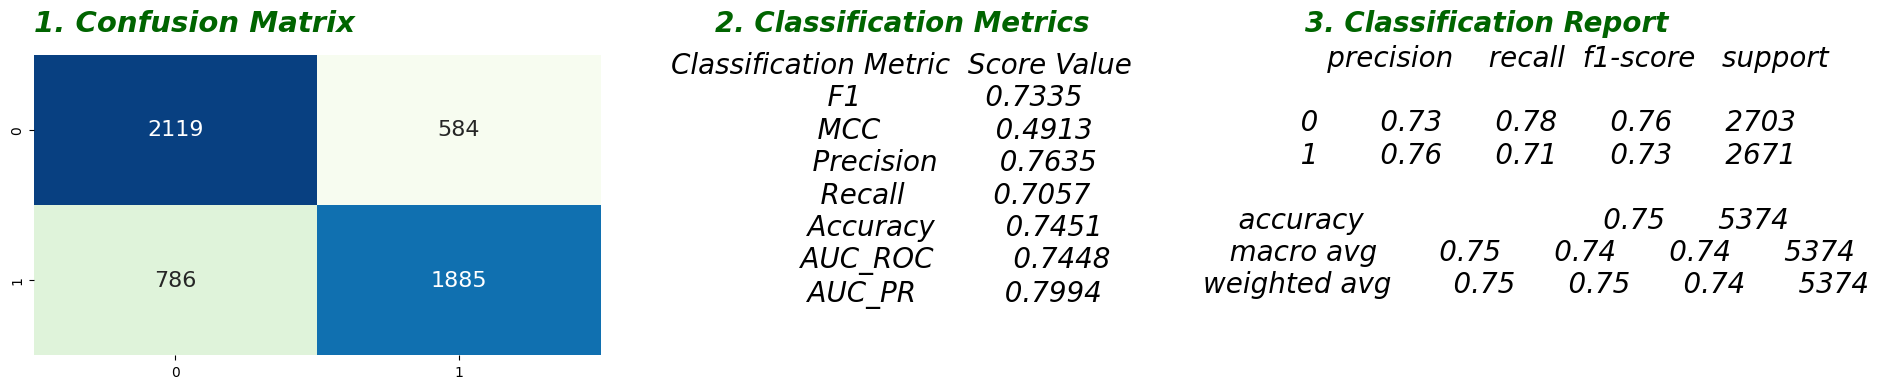

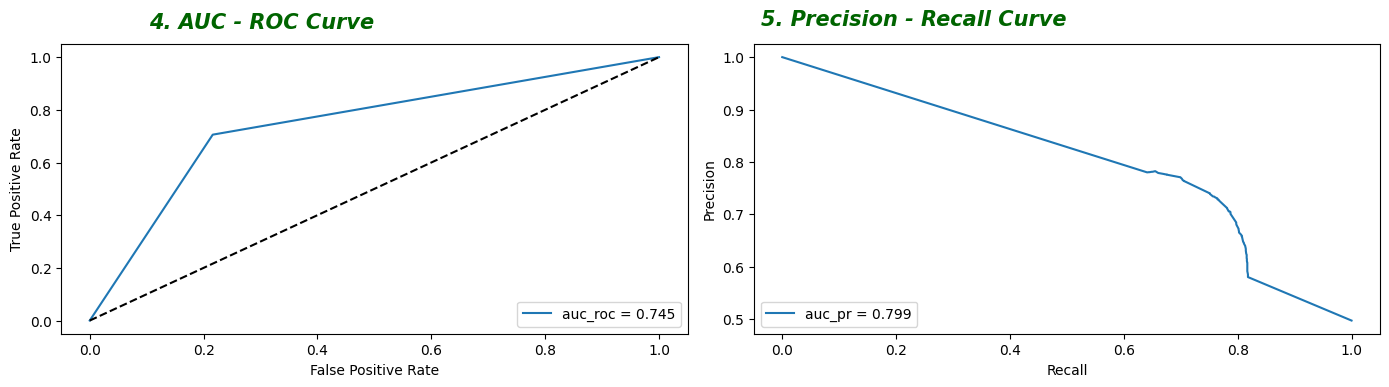

In [168]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train, Y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(tree, X_test, Y_test, model_name="Default Decision Tree")

In [169]:
tree = DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 30), 
#               "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(2, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
tree_grid = RandomizedSearchCV(tree, param_grid, cv = 5) 
    
# fitting the model for grid search 
tree_grid.fit(X_train, Y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", tree_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", tree_grid.best_estimator_)

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 7}

Best Classifier: DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=7,
                       random_state=100)


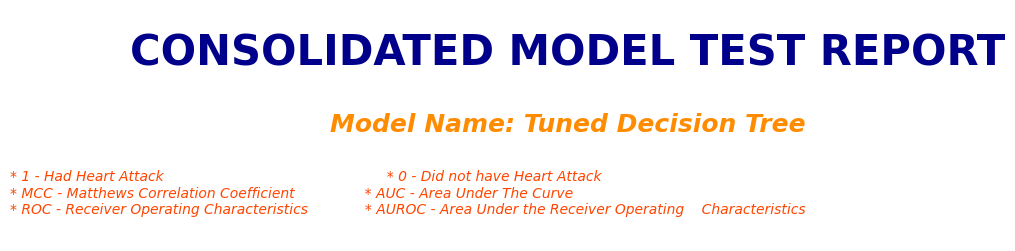

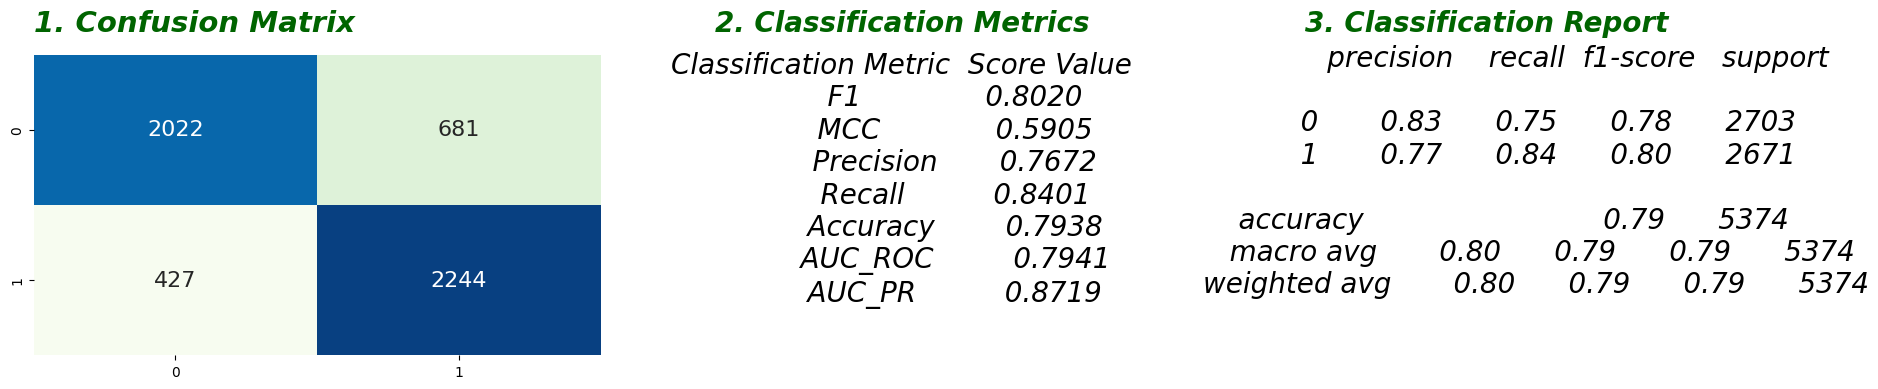

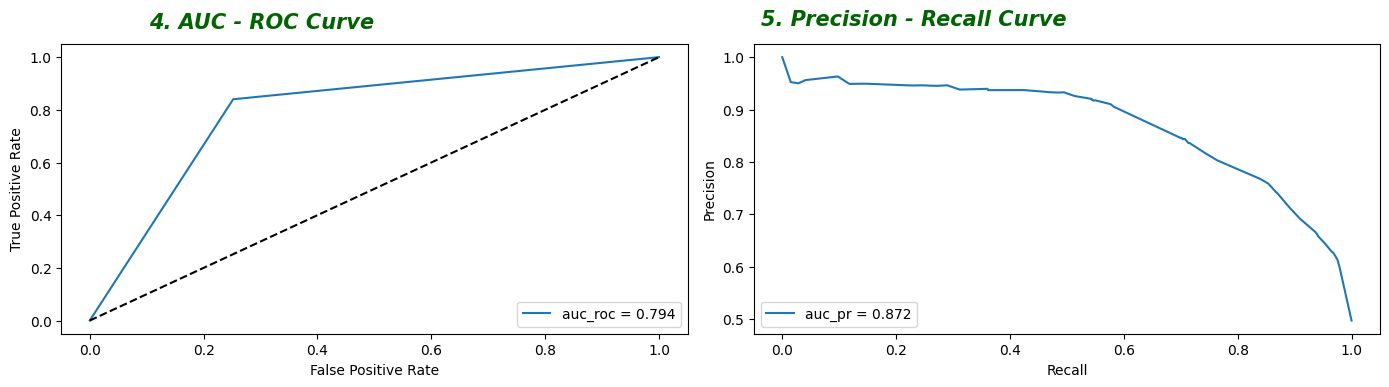

In [189]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_train, Y_train.values.ravel())

# Generate the model test classification report
best_tree_model = Generate_Model_Test_Classification_Report(best_tree, X_test, Y_test, model_name="Tuned Decision Tree")

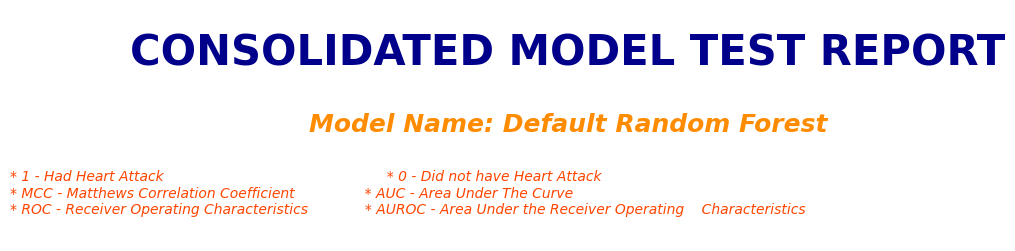

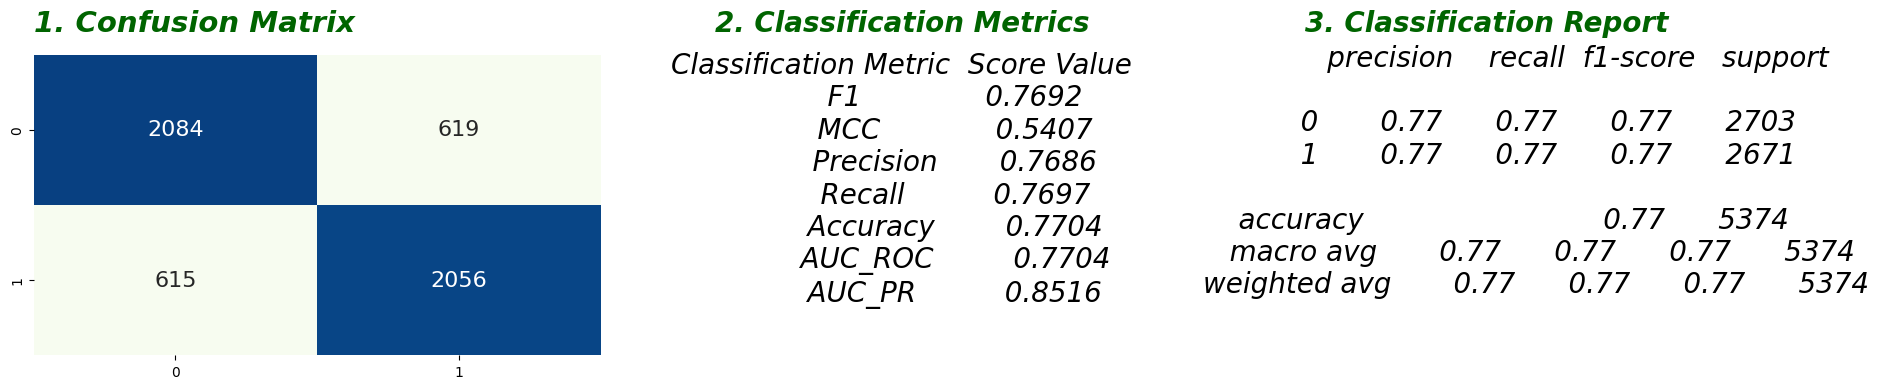

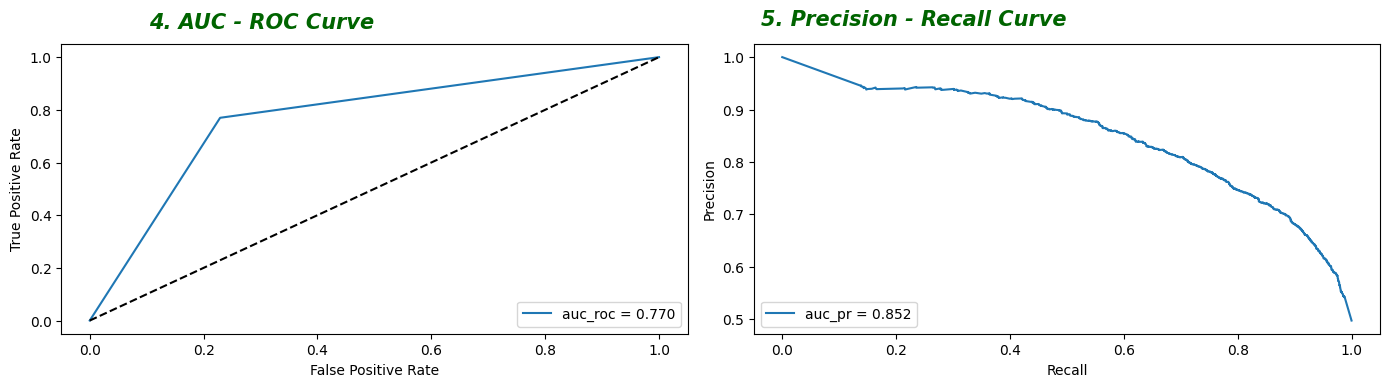

In [172]:
# Random Forest with Default Parameters
rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)

rfc = rfc.fit(X_train, Y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(rfc, X_test, Y_test, model_name="Default Random Forest")

In [173]:
rn_forest = RandomForestClassifier(n_jobs = -1, random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 10), 
#               "max_features": randint(1, 3), 
              "min_samples_leaf": randint(25, 50),
              "min_samples_split":range(50, 100, 2),
              "n_estimators": range(1000, 8000, 500),
              "bootstrap": [True, False]}

# Instantiating RandomizedSearchCV object 
forest_grid = RandomizedSearchCV(rn_forest, param_grid, cv = 5) 
    
# fitting the model for grid search 
forest_grid.fit(X_train, Y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", forest_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", forest_grid.best_estimator_) 

Best Parameters: {'bootstrap': False, 'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 74, 'n_estimators': 2000}

Best Classifier: RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=30,
                       min_samples_split=74, n_estimators=2000, n_jobs=-1,
                       random_state=100)


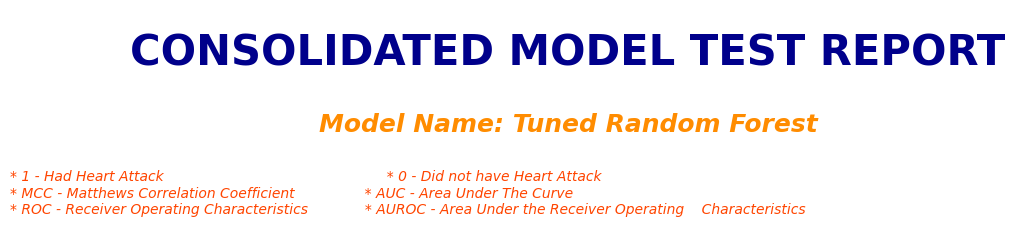

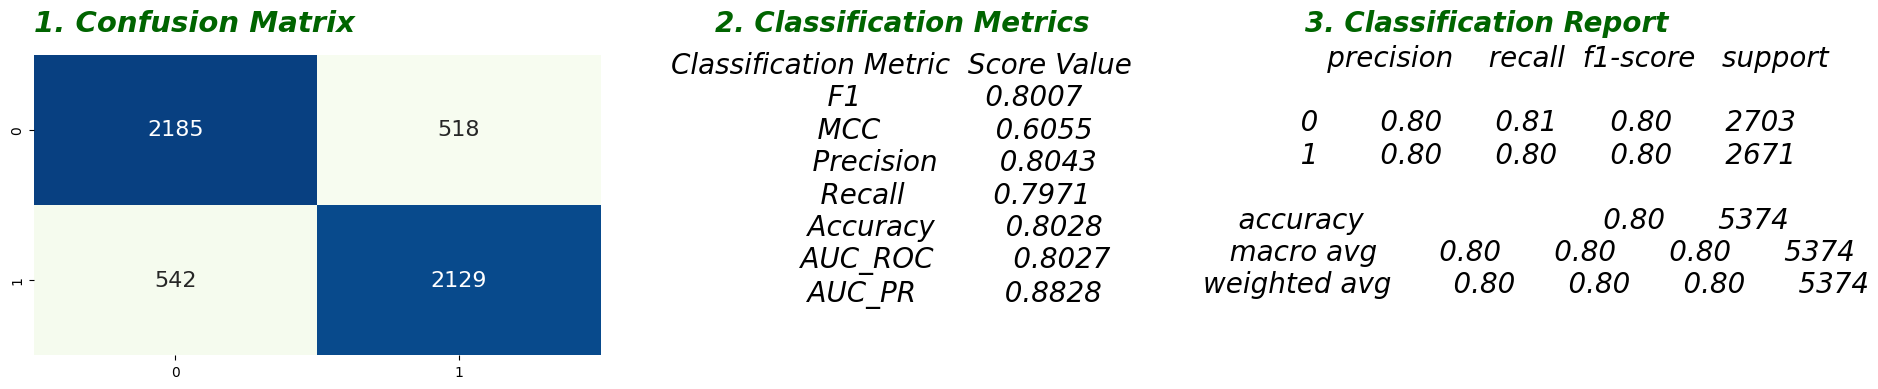

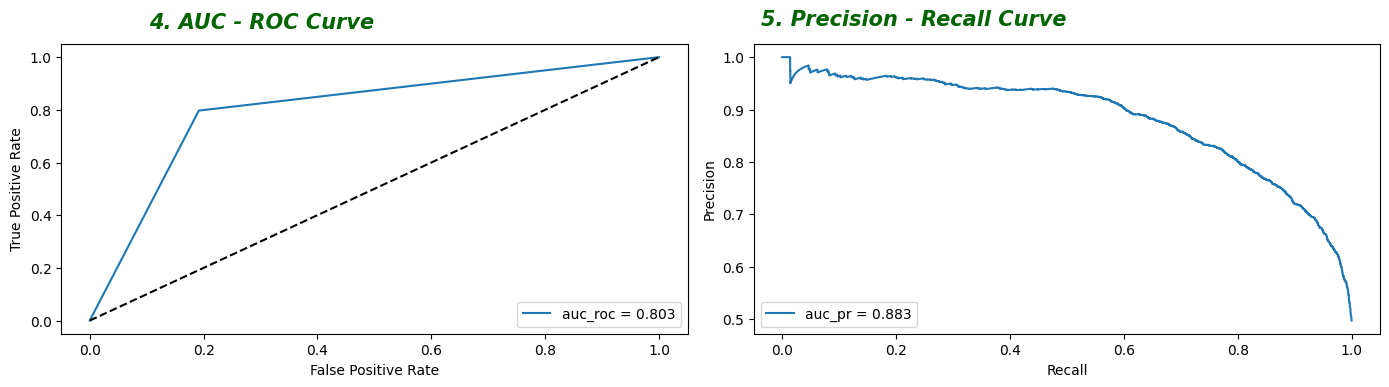

In [190]:
best_forest = forest_grid.best_estimator_

best_forest = best_forest.fit(X_train, Y_train.values.ravel())

# Generate the model test classification report
best_forest_model = Generate_Model_Test_Classification_Report(best_forest, X_test, Y_test, model_name="Tuned Random Forest")

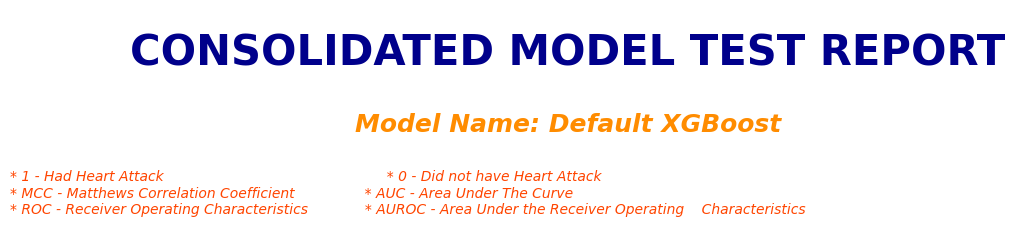

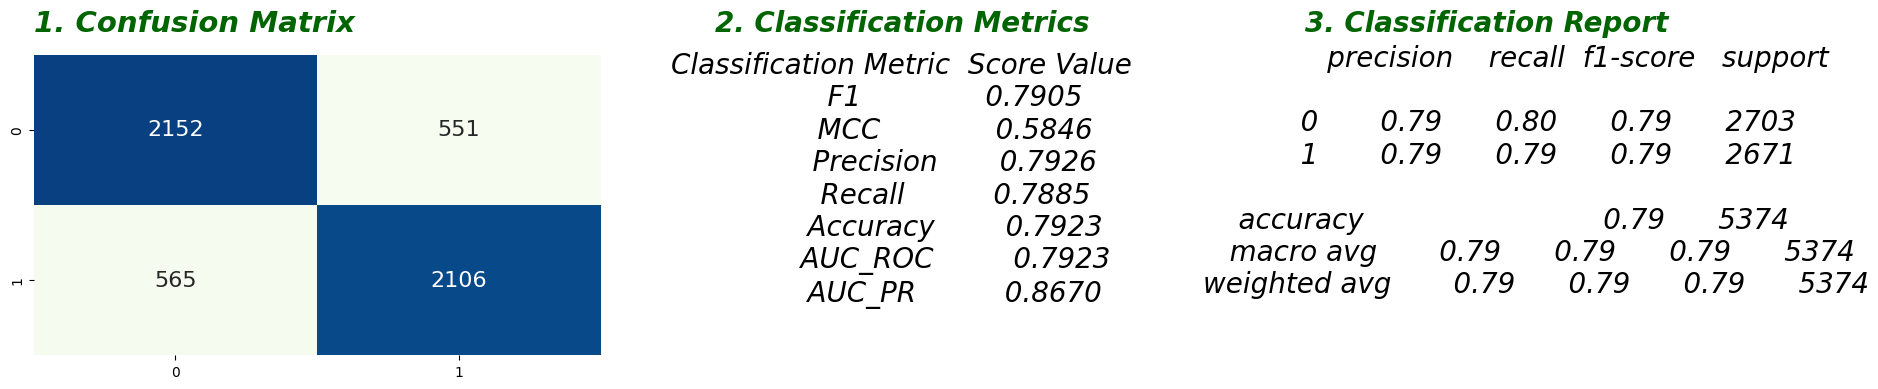

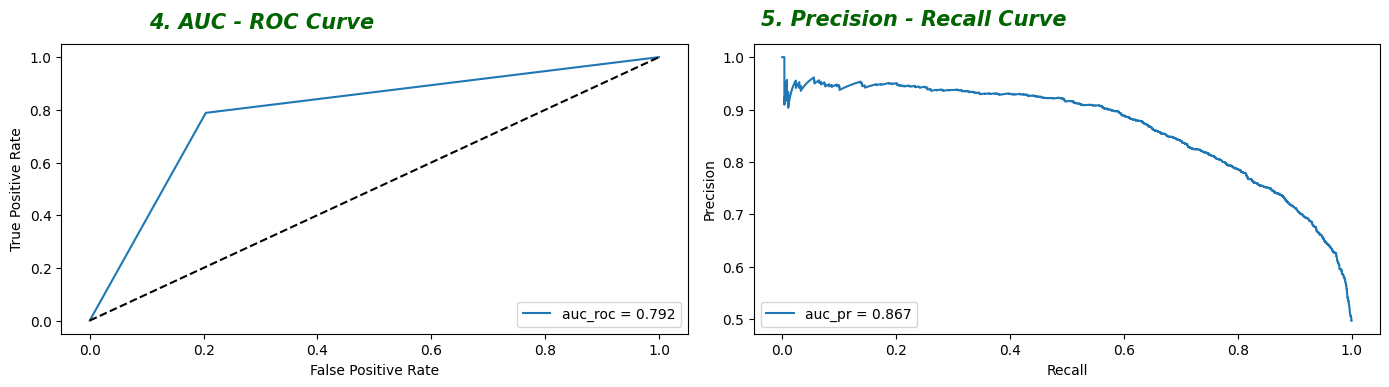

In [176]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100)

xgb = xgb.fit(X_train, Y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(xgb, X_test, Y_test, model_name="Default XGBoost")

In [177]:
xgb.feature_importances_

array([0.01520721, 0.02299815, 0.01107585, 0.76058245, 0.03733882,
       0.01001953, 0.01175264, 0.01705381, 0.00983238, 0.0737899 ,
       0.02196717, 0.00838211], dtype=float32)

In [178]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100)

param_grid = {'max_depth': range(4, 40),
             'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99],
             'n_estimators': range(100, 1100, 100),
             'min_child_weight': range(1, 11),
             'subsample': np.arange(0.1, 1.1, 0.1),
             'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
xgb_grid = RandomizedSearchCV(xgb, param_grid, cv = 5) 
    
# fitting the model for grid search 
xgb_grid.fit(X_train, Y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", xgb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", xgb_grid.best_estimator_)

Best Parameters: {'subsample': 1.0, 'n_estimators': 800, 'min_child_weight': 9, 'max_depth': 11, 'learning_rate': 0.3, 'colsample_bytree': 0.1}

Best Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)


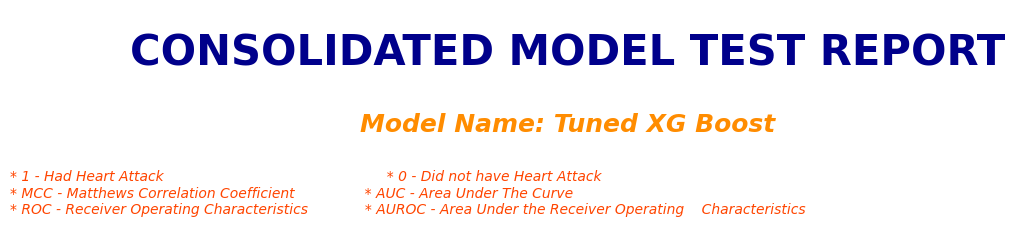

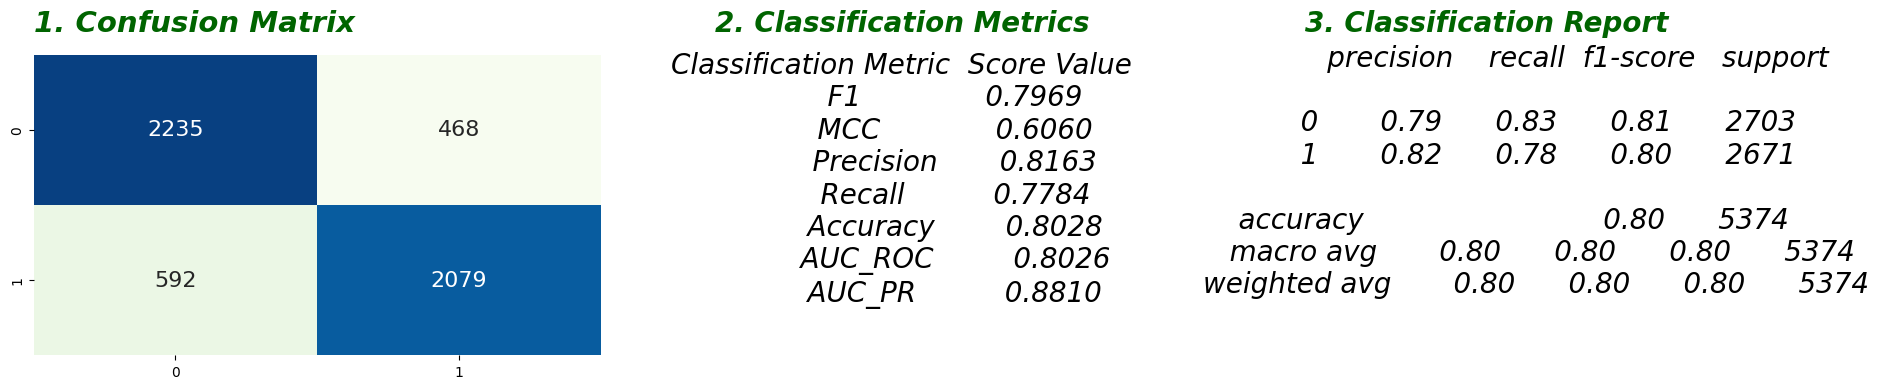

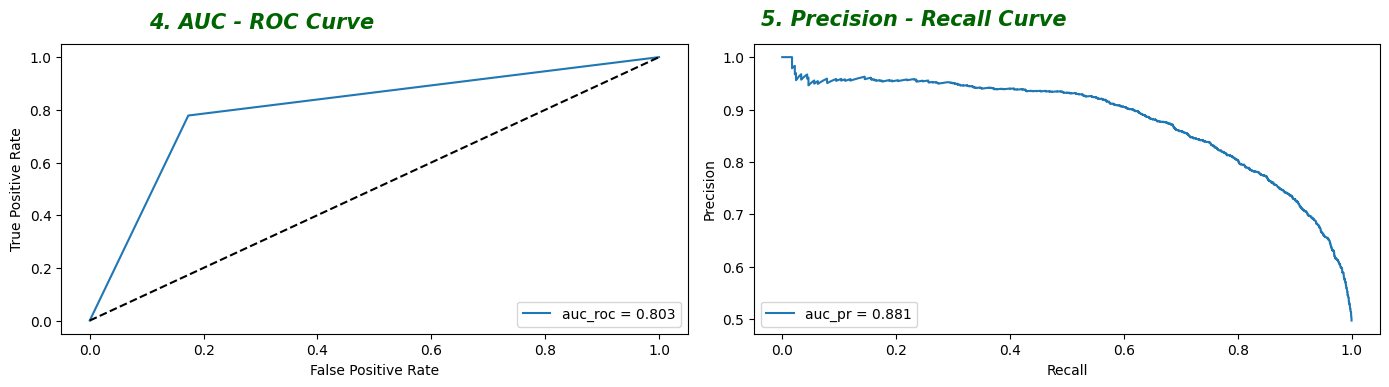

In [193]:
# XG Boost with Best Hypertuned Parameters
best_xgb = xgb_grid.best_estimator_

best_xgb.fit(X_train, Y_train.values.ravel())

# Generate the model test classification report
best_xgb_model = Generate_Model_Test_Classification_Report(best_xgb, X_test, Y_test, model_name="Tuned XG Boost")

In [241]:

results=[best_svc[0],
         best_tree_model[0],
         best_forest_model[0],
         best_xgb_model[0],]
models = ['Support Vector Machine','Decision Tree','Random Forest','XG Boost']
results = pd.DataFrame(data = results)
results.columns = ['F1','MCC','Precision','Recall','Accuracy','AUC_ROC','AUC_PR']
results['Models'] = models
results = results[['Models','F1','MCC','Precision','Recall','Accuracy','AUC_ROC','AUC_PR']]
results

Models        F1       MCC  Precision    Recall  Accuracy  \
0  Support Vector Machine  0.790133  0.603115   0.828067  0.755522  0.800521   
1           Decision Tree  0.802001  0.590503   0.767179  0.840135  0.793822   
2           Random Forest  0.800677  0.605497   0.804307  0.797080  0.802754   
3                XG Boost  0.796857  0.606032   0.816254  0.778360  0.802754   

    AUC_ROC    AUC_PR  
0  0.800255  0.862136  
1  0.794096  0.871853  
2  0.802720  0.882779  
3  0.802610  0.880989